<a href="https://colab.research.google.com/github/Donald24ever/Machine-Learning/blob/main/Copy_of_Machine_learning_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACHINE LEARNING COURSEWORK 

In [ ]:
import numpy as np
import pandas as pd
import time


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

#Reading the data

df = pd.read_csv('/Users/donaldokegbe/Downloads/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("Dataset Shape: ", df.shape)
print("Maximum Transaction Value: ", np.max(df.Amount))
print("Minimum Transaction Value: ", np.min(df.Amount))

Dataset Shape:  (284807, 31)
Maximum Transaction Value:  25691.16
Minimum Transaction Value:  0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#observing the spread of the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Exploratory Data Analysis (EDA)


In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print("normal_share=",normal_share,"            ","fraud_share=",fraud_share)

imbalance= (fraud_share/normal_share)*100
print('Imbalance Percentage = ' + str(imbalance))

normal_share= 99.82725143693798              fraud_share= 0.1727485630620034
Imbalance Percentage = 0.173047500131896


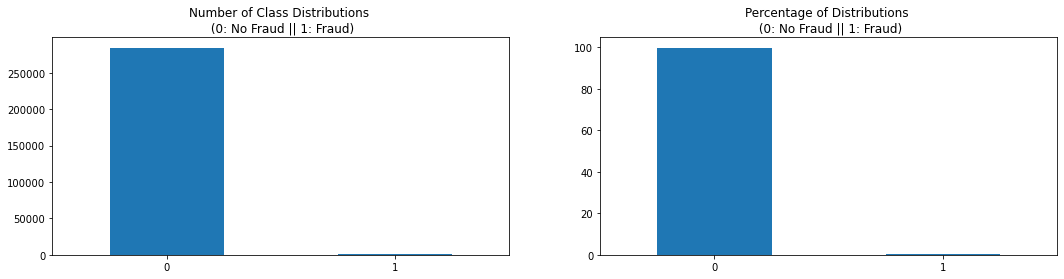

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
fig, ax = plt.subplots(1, 2, figsize=(18,4))

classes.plot(kind='bar', rot=0, ax=ax[0])
ax[0].set_title('Number of Class Distributions \n (0: No Fraud || 1: Fraud)')

(classes/df['Class'].count()*100).plot(kind='bar', rot=0, ax=ax[1])
ax[1].set_title('Percentage of Distributions \n (0: No Fraud || 1: Fraud)')

plt.show()

In the second figure we can see that that 98% of the transactions are non fraudulent, where as apporx 2% of transactions are fraudulent. Hence we can see that this project has a Data Imbalance problem.

Using bivariant analysis to investigate two variables and their relationship (Time and amount)

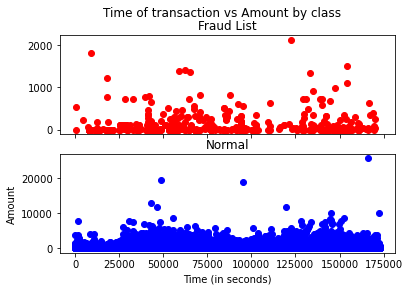

In [ ]:
# Create a scatter plot to observe the distribution of classes with time and amount
fraud = df[df.Class == 1]
normal = df[df.Class == 0]
# time vs Amount

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount, color = 'red')
ax1.set_title('Fraud List')

ax2.scatter(normal.Time, normal.Amount, color = 'blue')
ax2.set_title('Normal')

plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()


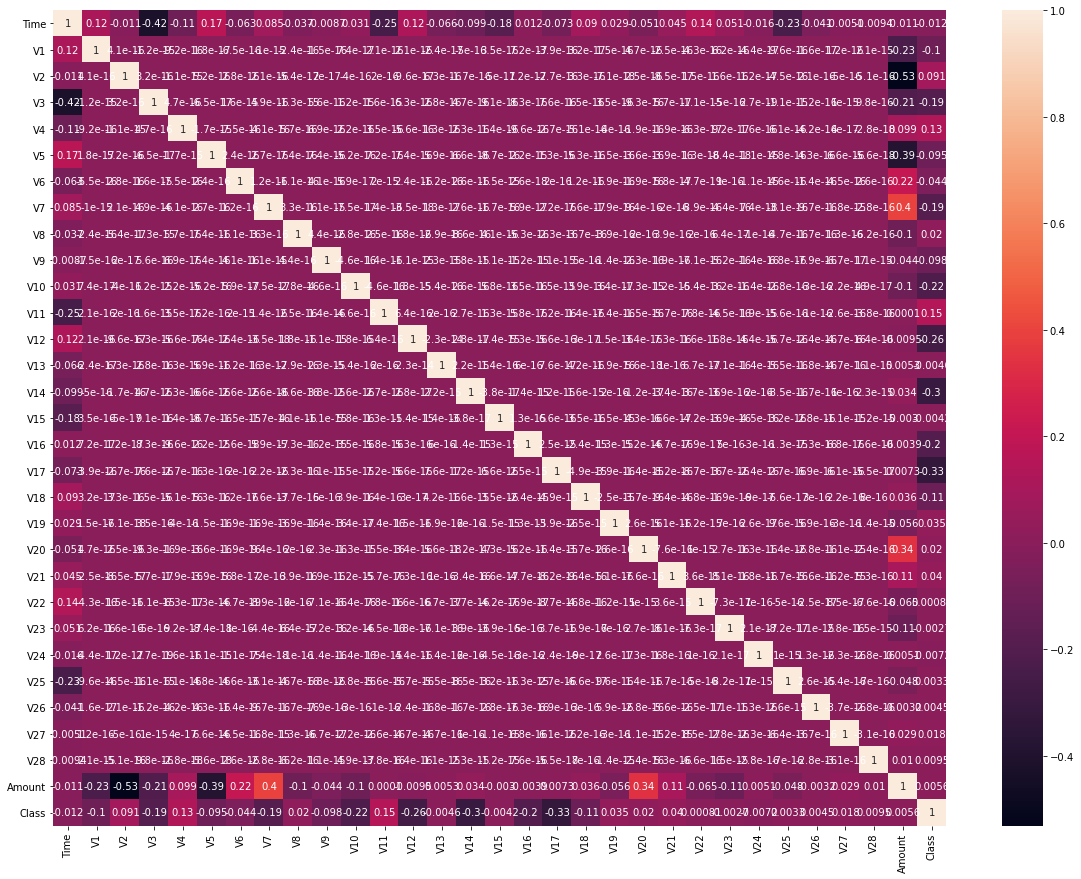

In [ ]:
# checking how variables are correlated
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

# Splitting the data into train and test data

In [ ]:
y= df['Class']
X= df.loc[:, df.columns != 'Class']

In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, train_size = 0.7, test_size = 0.3, 
                                                                    random_state = 42, stratify=y)

In [ ]:
#The X-test,y-test would be preserved to evaluate the test data once the model is built

print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


# Detecting if there is skewness present in the distribution used by plotting the distribution of the variable and apply power transformer if there are any.

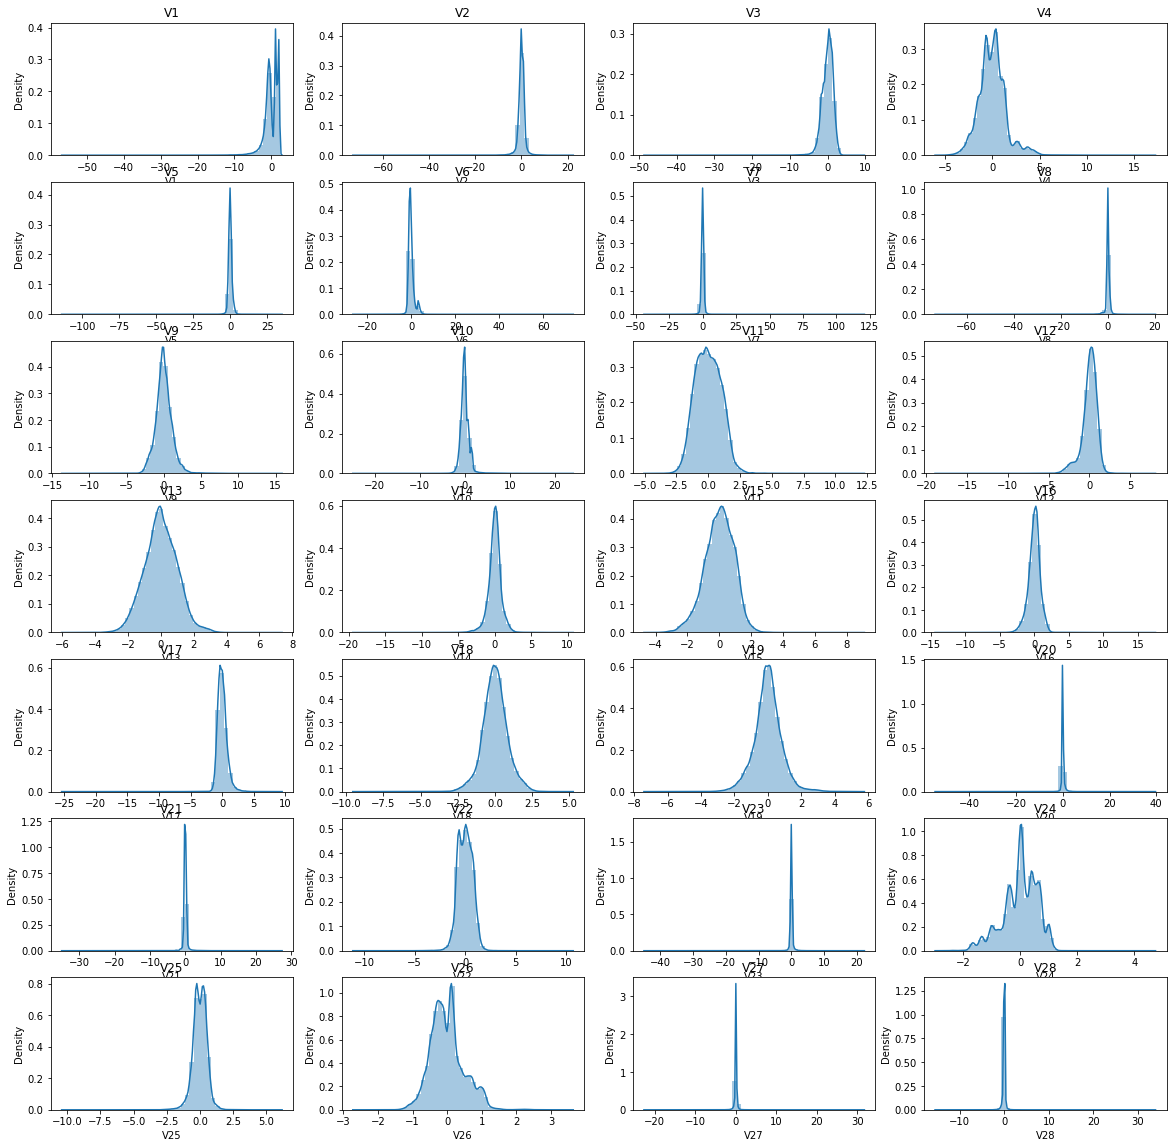

In [ ]:
k=0
fig, ax = plt.subplots(7, 4, figsize=(20,20))
for i in range(7):
    for j in range(4):
        k=k+1
        sns.distplot(X_train['V'+str(k)], ax=ax[i][j])
        ax[i][j].set_title('V'+str(k))

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)
pt.fit(X_train)                       

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [ ]:
print(X_train_pt.shape)
print(y_train_pt.shape)


(199364, 30)
(199364,)


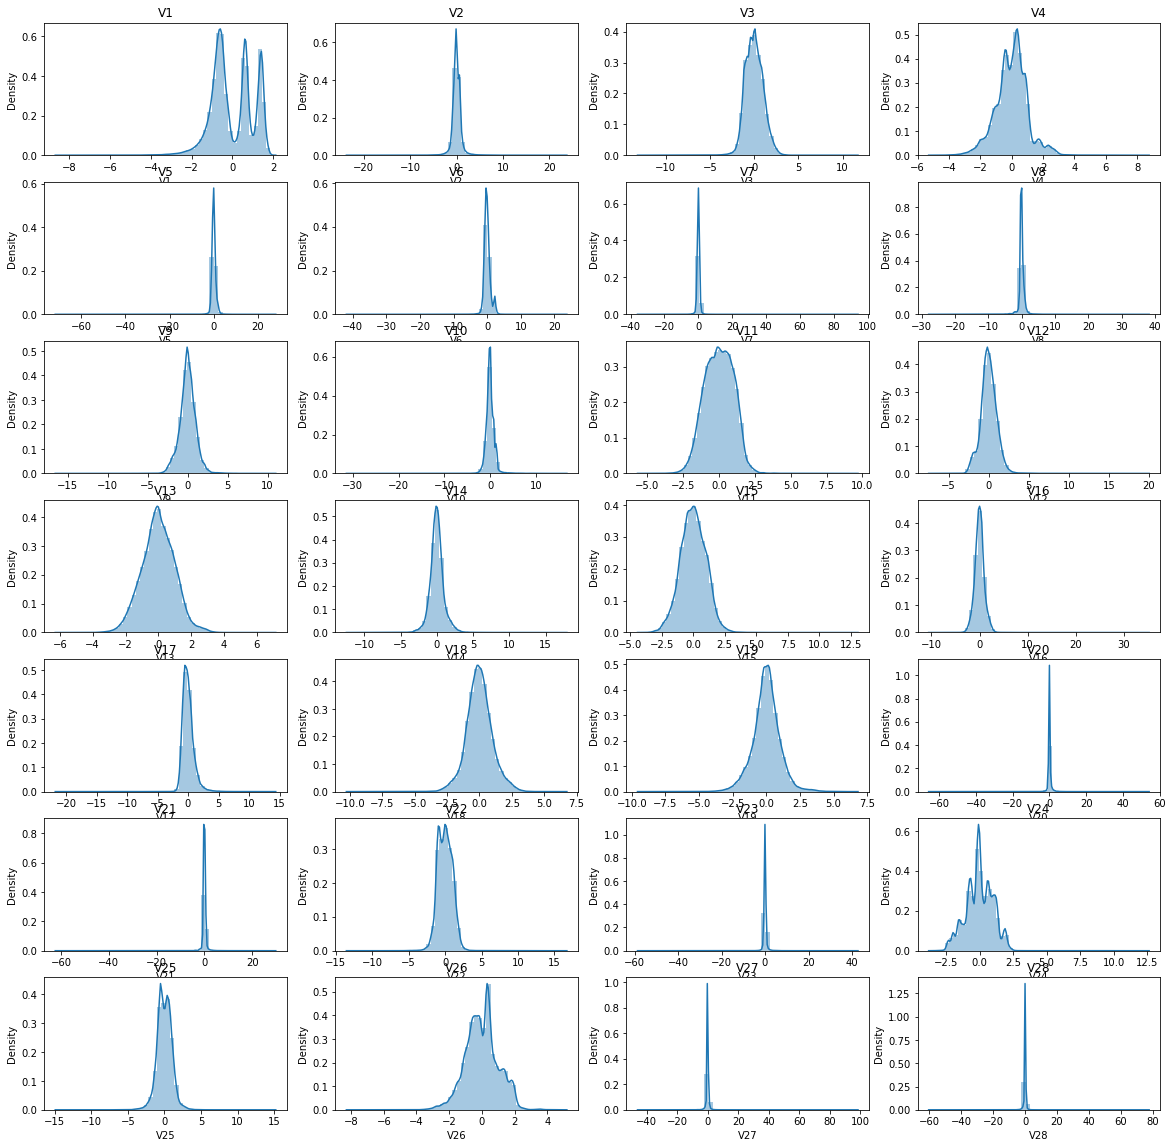

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
X_train_pt_df = pd.DataFrame(X_train_pt,columns=X_train.columns)
k=0
fig, ax = plt.subplots(7, 4, figsize=(20,20))
for i in range(7):
    for j in range(4):
        k=k+1
        sns.distplot(X_train_pt_df['V'+str(k)], ax=ax[i][j])
        ax[i][j].set_title('V'+str(k))

# Model Evaluation

In [ ]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

Create Stratified Cross Validation Scheme



In [ ]:
# perfom cross validation on the X_train & y_train 
from sklearn.model_selection import StratifiedKFold

#perform cross validation
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
print("Logistic Regression Classifier: --------------------------")
for c in [0.01, 0.1, 1, 10]:
    print("C=",c, "Penalty= l2")
    cv_score_mean=0
    for train_index, test_index in skf.split(X_train_pt, y_train_pt):
        print("Train:", train_index, "Test:", test_index)
        X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
        y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

        logreg_classifier = linear_model.LogisticRegression(penalty='l2',C=c)
        logreg_classifier.fit(X_train_cv,y_train_cv)

        y_test_pred= logreg_classifier.predict_proba(X_test_cv)
        cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
        cv_score_mean=cv_score_mean+cv_score
    print("ROC-AUC Score=", cv_score_mean/3)


Logistic Regression Classifier: --------------------------
C= 0.01 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9818467178725719
C= 0.1 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9819206917097439
C= 1 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66

In [ ]:
print("KNN Classifier: --------------------------")
for n_neighbor in [3,5,7]:
    print("n_neighbors=",n_neighbor)
    cv_score_mean=0
    for train_index, test_index in skf.split(X_train_pt, y_train_pt):
        print("Train:", train_index, "Test:", test_index)
        X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
        y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

        knn_classifier= KNeighborsClassifier(n_neighbors=n_neighbor)
        knn_classifier.fit(X_train_cv,y_train_cv)

        y_test_pred= knn_classifier.predict_proba(X_test_cv)
        cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
        cv_score_mean=cv_score_mean+cv_score
    print("ROC-AUC Score=", cv_score_mean/3)

KNN Classifier: --------------------------
n_neighbors= 3
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9184783204674684
n_neighbors= 5
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9257121487585124
n_neighbors= 7
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 13932

In [ ]:
print("SVM  Classifier: --------------------------")
for c in [1,2,3]:
    for gamma in ['auto','scale']:
        print("C=",c,"gamma=",gamma)
        cv_score_mean=0
        for train_index, test_index in skf.split(X_train_pt, y_train_pt):
            print("Train:", train_index, "Test:", test_index)
            X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
            y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

            svm_classifier= svm.SVC(C=c,gamma=gamma, probability=True)
            svm_classifier.fit(X_train_cv,y_train_cv)

            y_test_pred= svm_classifier.predict_proba(X_test_cv)
            cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
            cv_score_mean=cv_score_mean+cv_score
        print("ROC-AUC Score=", cv_score_mean/3)

SVM  Classifier: --------------------------
C= 1 gamma= auto
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9619718960818001
C= 1 gamma= scale
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9619524962936236
C= 2 gamma= auto
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 1381

In [ ]:
print("Decision Trees Classifier: --------------------------")
for min_samples_split in [10, 5, 2]:
    for min_samples_leaf in [10, 5, 1]:
        for max_features in ['auto','sqrt','log2',None]:
            print("min_samples_split=",min_samples_split, "min_samples_leaf=",min_samples_leaf,"max_features=",max_features)
            cv_score_mean=0
            for train_index, test_index in skf.split(X_train_pt, y_train_pt):
                print("Train:", train_index, "Test:", test_index)
                X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
                y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

                dt_classifier= DecisionTreeClassifier(min_samples_split=min_samples_split,
                                                      min_samples_leaf=min_samples_leaf,
                                                      max_features=max_features)
                dt_classifier.fit(X_train_cv,y_train_cv)

                y_test_pred= dt_classifier.predict_proba(X_test_cv)
                cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
                cv_score_mean=cv_score_mean+cv_score
            print("ROC-AUC Score=", cv_score_mean/3)

Decision Trees Classifier: --------------------------
min_samples_split= 10 min_samples_leaf= 10 max_features= auto
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9137974996245908
min_samples_split= 10 min_samples_leaf= 10 max_features= sqrt
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9137750969452836
min_samples_split= 10 min_samples_leaf= 10 max_features= log2
Train: [ 66445  66446  66447 ... 199361 199362 199

In [ ]:
print("Random Forest Classifier: --------------------------")
for n_estimators in [100,150,200]:
    for min_samples_leaf in [10,5,1]:
        for max_features in ['auto','sqrt','log2',None]:
            print("n_estimators=",n_estimators, "min_samples_leaf=",min_samples_leaf,"max_features=",max_features)
            cv_score_mean=0
            for train_index, test_index in skf.split(X_train_pt, y_train_pt):
                print("Train:", train_index, "Test:", test_index)
                X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
                y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

                rf_classifier= RandomForestClassifier(n_estimators=n_estimators,
                                                      min_samples_leaf=min_samples_leaf,
                                                      max_features=max_features, n_jobs=-1)
                rf_classifier.fit(X_train_cv,y_train_cv)

                y_test_pred= rf_classifier.predict_proba(X_test_cv)
                cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
                cv_score_mean=cv_score_mean+cv_score
            print("ROC-AUC Score=", cv_score_mean/3)

Random Forest Classifier: --------------------------
n_estimators= 100 min_samples_leaf= 10 max_features= auto
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9627802628761941
n_estimators= 100 min_samples_leaf= 10 max_features= sqrt
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9668098673967735
n_estimators= 100 min_samples_leaf= 10 max_features= log2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [ 

In [ ]:
#initialise the model with optimum hyperparameters
clf = linear_model.LogisticRegression(penalty='l2',C=0.1)  
clf.fit(X_train, y_train)
#predict on test to give probability
y_pred= clf.predict_proba(X_test)
#calculate the ROC-AUC
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("LogisticRegression ROC-AUC Score =", score)



clf = KNeighborsClassifier(n_neighbors=7)  
clf.fit(X_train, y_train)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("KNeighbors Classifier ROC-AUC Score =", score)

clf = svm.SVC(C=1,gamma='auto', probability=True)  
clf.fit(X_train, y_train)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("SVM Classifier ROC-AUC Score =", score)

clf = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=10,max_features=None)   
clf.fit(X_train, y_train)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("Decision Tree Classifier ROC-AUC Score =", score)

clf = RandomForestClassifier(n_estimators=200, min_samples_leaf=10, max_features='sqrt')  
clf.fit(X_train, y_train)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("Random Forest Classifier ROC-AUC Score =", score)


LogisticRegression ROC-AUC Score = 0.9119998479046489
KNeighbors Classifier ROC-AUC Score = 0.59578624582728
SVM Classifier ROC-AUC Score = 0.8679130695852074
Decision Tree Classifier ROC-AUC Score = 0.9084297660108083
Random Forest Classifier ROC-AUC Score = 0.9558031901999895


# Model building with balanced data set 

#### Random Oversampling

In [ ]:
pip install imblearn

     |████████████████████████████████| 206 kB 3.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# perfom cross validation on the X_train & y_train 
from sklearn.model_selection import StratifiedKFold

#perform cross validation
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
print("Logistic Regression Classifier: --------------------------")
for c in [0.01, 0.1, 1]:
    print("C=",c, "Penalty= l2")
    cv_score_mean=0
    for train_index, test_index in skf.split(X_train_pt, y_train_pt):
        print("Train:", train_index, "Test:", test_index)
        X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
        y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

        ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
        X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

        logreg_classifier = linear_model.LogisticRegression(penalty='l2',C=c)
        logreg_classifier.fit(X_ros_cv,y_ros_cv)

        y_test_pred= logreg_classifier.predict_proba(X_test_cv)
        cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
        cv_score_mean=cv_score_mean+cv_score
    print("ROC-AUC Score=", cv_score_mean/3)

Logistic Regression Classifier: --------------------------
C= 0.01 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9794049674449807
C= 0.1 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.978469749675776
C= 1 Penalty= l2
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  664

In [ ]:
print("KNN Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    knn_classifier= KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
    knn_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= knn_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

KNN Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9285324894040294


In [ ]:
print("SVM  Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    svm_classifier= svm.SVC(C=1,gamma='auto', probability=True)
    svm_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= svm_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

SVM  Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.8905207806581771


In [ ]:
print("Decision Trees Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    dt_classifier= DecisionTreeClassifier(min_samples_split=5,
                                        min_samples_leaf=10,
                                        max_features=None)
    dt_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= dt_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

Decision Trees Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.8922221062841792


In [ ]:
print("Random Forest Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    rf_classifier= RandomForestClassifier(n_estimators=200,
                                        min_samples_leaf=10,
                                        max_features='log2', n_jobs=-1)
    rf_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= rf_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

Random Forest Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9691608488765047


#### SMOTE

In [ ]:
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [ ]:
print("Imbalance in Original y_train : ")
pd.crosstab( y_train, columns='count')

Imbalance in Original y_train : 


col_0,count
Class,
0,199020
1,344


In [ ]:
print("y_train after SMOTE : ")
#Checking the class (percentage) distribution of the target after SMOTE
pd.crosstab( y_train_smote, columns='count')

y_train after SMOTE : 


col_0,count
Class,
0,199020
1,199020


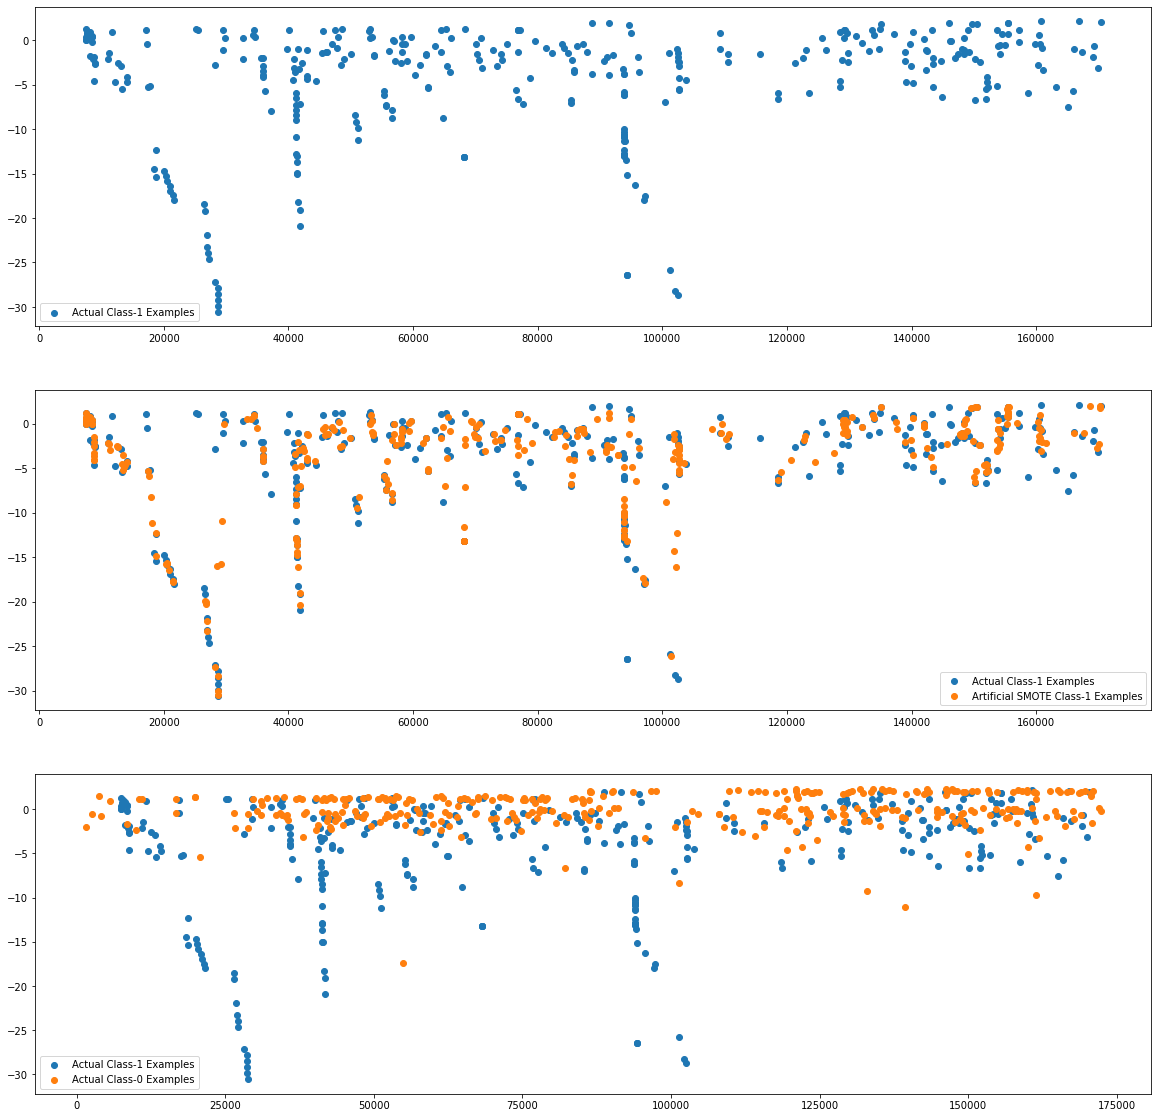

In [ ]:
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
print("Logistic Regression Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    logreg_classifier = linear_model.LogisticRegression(penalty='l2',C=0.1)
    logreg_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= logreg_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

print("KNN Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    knn_classifier= KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
    knn_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= knn_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)





Logistic Regression Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9758207604753758
KNN Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9427627194381379


In [ ]:
print("Decision Trees Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    dt_classifier= DecisionTreeClassifier(min_samples_split=5,
                                        min_samples_leaf=10,
                                        max_features=None)
    dt_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= dt_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)


Decision Trees Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9173096182353793


In [ ]:
print("Random Forest Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    rf_classifier= RandomForestClassifier(n_estimators=200,
                                        min_samples_leaf=10,
                                        max_features='sqrt', n_jobs=-1)
    rf_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= rf_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

Random Forest Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.9797003865853439


In [ ]:
print("SVM  Classifier: --------------------------")
cv_score_mean=0
for train_index, test_index in skf.split(X_train_pt, y_train_pt):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X_train_pt[train_index], X_train_pt[test_index]
    y_train_cv, y_test_cv = y_train_pt.iloc[train_index], y_train_pt.iloc[test_index]

    ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
    X_ros_cv,y_ros_cv = ros.fit_resample(X_train_cv,y_train_cv)

    svm_classifier= svm.SVC(C=1,gamma='auto', probability=True)
    svm_classifier.fit(X_ros_cv,y_ros_cv)

    y_test_pred= svm_classifier.predict_proba(X_test_cv)
    cv_score= roc_auc_score(y_true=y_test_cv,y_score=y_test_pred[:,1])
    cv_score_mean=cv_score_mean+cv_score
print("ROC-AUC Score=", cv_score_mean/3)

SVM  Classifier: --------------------------
Train: [ 66445  66446  66447 ... 199361 199362 199363] Test: [    0     1     2 ... 70425 70553 70999]
Train: [     0      1      2 ... 199361 199362 199363] Test: [ 66445  66446  66447 ... 138185 139321 140189]
Train: [     0      1      2 ... 138185 139321 140189] Test: [132898 132899 132900 ... 199361 199362 199363]
ROC-AUC Score= 0.8803740441052078


### Use the best models to Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

#initialise the model with optimum hyperparameters
clf = linear_model.LogisticRegression(penalty='l2',C=0.1)
#oversampling method 
ros = over_sampling.RandomOverSampler(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train) 
clf.fit(X_ros,y_ros)
#predict on test to give probability
y_pred= clf.predict_proba(X_test)
#calculate the ROC-AUC
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("LogisticRegression ROC-AUC Score =", score)

clf = KNeighborsClassifier(n_neighbors=7)  
ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train) 
clf.fit(X_ros,y_ros)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("KNeighbors Classifier ROC-AUC Score =", score)

clf = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=10,max_features=None)   
ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train) 
clf.fit(X_ros,y_ros)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("Decision Tree Classifier ROC-AUC Score =", score)

clf = RandomForestClassifier(n_estimators=200, min_samples_leaf=10, max_features='sqrt')  
ros = over_sampling.SMOTE(sampling_strategy='minority', random_state=42)
X_ros,y_ros = ros.fit_resample(X_train,y_train) 
clf.fit(X_ros,y_ros)
y_pred= clf.predict_proba(X_test)
score= roc_auc_score(y_true=y_test,y_score=y_pred[:,1])
print("Random Forest Classifier ROC-AUC Score =", score)

LogisticRegression ROC-AUC Score = 0.9602504345015629
KNeighbors Classifier ROC-AUC Score = 0.7148937788248415
Decision Tree Classifier ROC-AUC Score = 0.8974321630969149
Random Forest Classifier ROC-AUC Score = 0.9801792427869571


Top var = 15
2nd Top var = 5
3rd Top var = 11


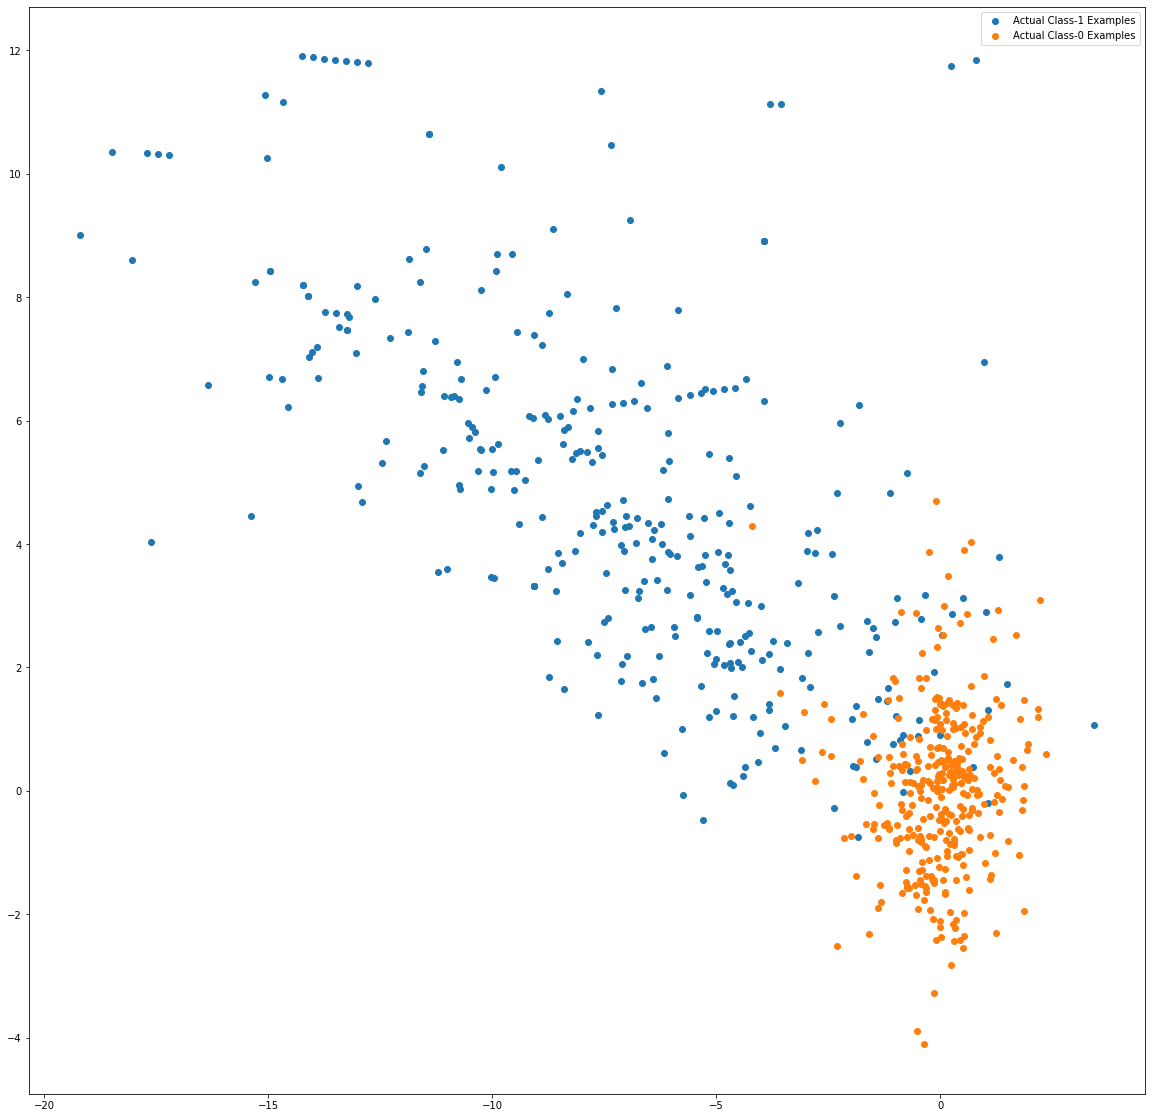

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Choosing The Best Threshold

To choose the best threshold a frame of columns "actual_label" and "predicted_prob" on training data was created 

In [ ]:
y_train_pred= clf.predict_proba(X_train.values)
y_df = pd.DataFrame({'actual_label':y_train, 'predicted_prob':y_train_pred[:,1]})
y_df.head()

,actual_label,predicted_prob
249927,0,0.0
214082,0,0.0
106005,0,0.0
58619,0,0.0
191638,0,0.0


In [ ]:
# find the best threshold best on roc_curve to know the range for search
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.585505779987253


In [ ]:
# Let's create columns with different probability cutoffs 
thresholds = [0.59,0.586,0.5875,0.587,0.598,0.58,0.67,0.5,0.6]
for i in thresholds:
    y_df[i]= y_df.predicted_prob.map(lambda x: 1 if x > i else 0)
y_df.head()

,actual_label,predicted_prob,predicted_label,0.59,0.586,0.5875,0.587,0.598,0.58,0.57,0.5,0.6
186882,0,0.005431,0,0,0,0,0,0,0,0,0,0
165754,0,0.000000,0,0,0,0,0,0,0,0,0,0
235285,0,0.008980,0,0,0,0,0,0,0,0,0,0
101271,0,0.000000,0,0,0,0,0,0,0,0,0,0
5832,0,0.000000,0,0,0,0,0,0,0,0,0,0


In [ ]:
# calculate Precision and Recall  for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','precision','recall'])
from sklearn.metrics import confusion_matrix

thresholds = [0.59,0.586,0.5875,0.587,0.598,0.58,0.57,0.5,0.6]
for i in thresholds:
    cm = metrics.confusion_matrix(y_df.actual_label, y_df[i])
    total=sum(sum(cm))
    precision = cm[1,1]/(cm[1,1]+cm[0,1])
    recall =  cm[1,1]/(cm[1,1]+cm[1,0])

    cutoff_df.loc[i] =[ i ,precision,recall]
print(cutoff_df)

          prob  precision    recall
0.5900  0.5900   0.784314  0.810811
0.5860  0.5860   0.779221  0.810811
0.5875  0.5875   0.779221  0.810811
0.5870  0.5870   0.779221  0.810811
0.5980  0.5980   0.789474  0.810811
0.5800  0.5800   0.779221  0.810811
0.5700  0.5700   0.779221  0.810811
0.5000  0.5000   0.746914  0.817568
0.6000  0.6000   0.789474  0.810811


In [ ]:
# f1 = (2*precision*recall)/(precision+recall)
f1 = (2*0.779221*0.810811)/(0.779221+0.810811)
print(f1)

0.7947021924476992


The Threshold of "0.5860" gives a Precision of 77.9% and F1 Score of 79.47% on Training data. Let see these scores on test

In [ ]:
y_test_pred= clf.predict_proba(X_test.values)
y_df = pd.DataFrame({'actual_label':y_test, 'predicted_prob':y_test_pred[:,1]})
y_df['predicted_label']= y_df.predicted_prob.map(lambda x: 1 if x > 0.5860 else 0)
y_df.head()

,actual_label,predicted_prob,predicted_label
186882,0,0.005431,0
165754,0,0.000000,0
235285,0,0.008980,0
101271,0,0.000000,0
5832,0,0.000000,0


In [ ]:
cm = metrics.confusion_matrix(y_df.actual_label, y_df.predicted_label)
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall =  cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*precision*recall)/(precision+recall)

print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)


Precision: 0.7792207792207793
Recall: 0.8108108108108109
F1 Score: 0.794701986754967


This threshold is selected because it has a good Recall and high precision and is  good in predicting "Actual possitives as True Possitives" thus helping the European bank in catching fraud which may include even a few non-fraudulent cases.